In [2]:
# Librerias utilizadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
# Cargamos el DataFrame
data = pd.read_parquet('Datasets/train.parquet')

In [298]:
# Vemos nulos por columna
columnas = list(data.columns)
for i in columnas:
    print (i,"tiene valores nulos =",data[i].isnull().sum())

id tiene valores nulos = 0
url tiene valores nulos = 0
region tiene valores nulos = 0
region_url tiene valores nulos = 0
price tiene valores nulos = 0
type tiene valores nulos = 0
sqfeet tiene valores nulos = 0
beds tiene valores nulos = 0
baths tiene valores nulos = 0
cats_allowed tiene valores nulos = 0
dogs_allowed tiene valores nulos = 0
smoking_allowed tiene valores nulos = 0
wheelchair_access tiene valores nulos = 0
electric_vehicle_charge tiene valores nulos = 0
comes_furnished tiene valores nulos = 0
laundry_options tiene valores nulos = 71171
parking_options tiene valores nulos = 126682
image_url tiene valores nulos = 0
description tiene valores nulos = 2
lat tiene valores nulos = 1722
long tiene valores nulos = 1722
state tiene valores nulos = 0


[]

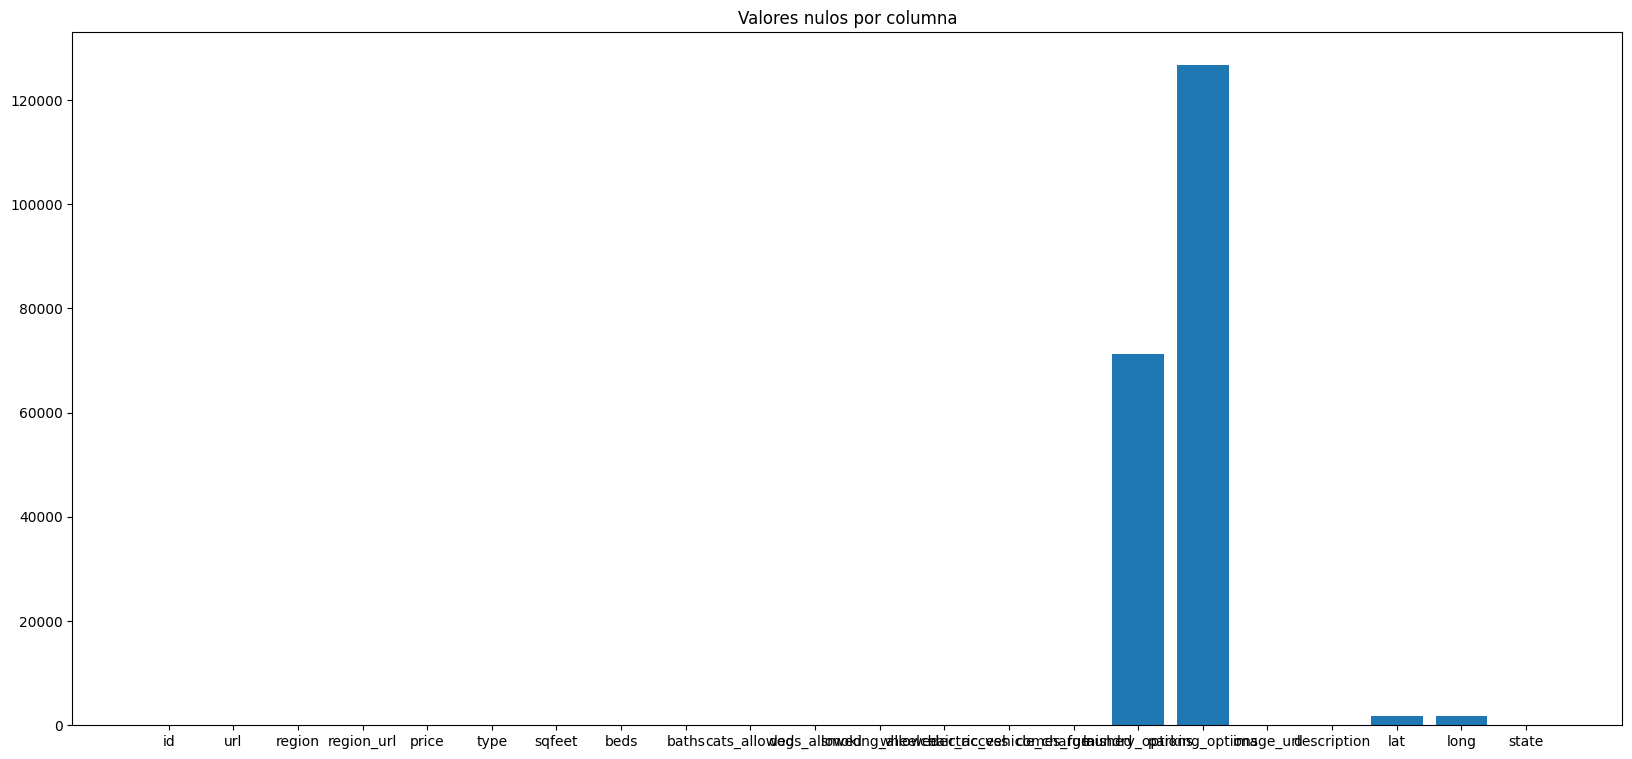

In [299]:
cols = data.columns
nulos = data.isnull().sum()
plt.figure(figsize=(20, 9))
plt.title('Valores nulos por columna')
plt.bar(cols, nulos)
#sns.barplot(x=cols, y=nulos)
plt.plot()

 Dado la cantidad de nulos en características importantes como latitud y longitud,  tomé metros cuadrados para obtener palabras reelevantes que me permitan deducir si una propiedad es cara o no.

In [300]:
# Verificamos la cantidad de la columna metros cuadrados que tengan valores igual a 0 
data[data["sqfeet"]== 0].shape[0]

43

In [301]:
# Eliminamos los valores = 0 de la columna sqfeet
data = data[data["sqfeet"]!= 0]


In [302]:
# Revisamos que no hayan quedado registron con sqfeet con valores igual a 0
data[data["sqfeet"]== 0].shape[0]

0

In [303]:
# Verificamos la cantidad de la columna price que tengan valores igual a 0 
data[data["price"]==0].shape[0]

1175

In [304]:
#Eliminamos valores igual a 0
data = data[data["price"]!= 0]

In [305]:
# Revisamos que no hayan quedado registron con price con valores igual a 0
data[data["price"]== 0].shape[0]

0

In [306]:
#Verificamos que no tenga valores vacios
data[data["state"]==" "].shape[0]

0

In [307]:
#Nos quedamos con las colummnas que nos interesan
data=data[["sqfeet","price","type","state","beds","baths"]]

In [308]:
data.shape

(345261, 6)

In [309]:
# Creo Diccionaros para reemplazar valores de la columna type y state
x_type= (data['type'].unique())

x_state= (data['state'].unique())

my_dictype ={}
i = 0
for item in x_type:
    my_dictype[item] = i
    i=i+1

print(my_dictype)

my_dicstate ={}
i = 0
for item in x_state:
    my_dicstate[item] = i
    i=i+1

print(my_dicstate)



{'house': 0, 'apartment': 1, 'duplex': 2, 'loft': 3, 'condo': 4, 'manufactured': 5, 'townhouse': 6, 'in-law': 7, 'cottage/cabin': 8, 'flat': 9, 'assisted living': 10, 'land': 11}
{'id': 0, 'co': 1, 'va': 2, 'az': 3, 'tn': 4, 'tx': 5, 'ma': 6, 'ks': 7, 'pa': 8, 'me': 9, 'ms': 10, 'la': 11, 'mn': 12, 'ky': 13, 'wa': 14, 'al': 15, 'ca': 16, 'ga': 17, 'nc': 18, 'md': 19, 'ia': 20, 'fl': 21, 'or': 22, 'ar': 23, 'hi': 24, 'nj': 25, 'ut': 26, 'wv': 27, 'ny': 28, 'sc': 29, 'oh': 30, 'mo': 31, 'mi': 32, 'ak': 33, 'sd': 34, 'ok': 35, 'dc': 36, 'in': 37, 'ct': 38, 'ri': 39, 'ne': 40, 'nd': 41, 'nv': 42, 'wi': 43, 'nh': 44, 'de': 45, 'il': 46, 'nm': 47, 'mt': 48, 'vt': 49, 'wy': 50}


In [310]:
data['type'] = data['type'].map(my_dictype)
data['state'] = data['state'].map(my_dicstate)
data.head(30)

,sqfeet,price,type,state,beds,baths
0,1200,1350,0,0,2,2.0
1,694,1115,1,1,1,1.0
2,900,1129,1,2,2,2.0
3,1469,1580,0,3,3,2.0
4,700,995,1,4,1,1.0
5,1649,1114,0,5,3,2.0
6,1150,1300,1,6,3,1.0
7,1050,960,1,7,3,2.0
8,1200,825,1,8,3,1.5
9,1230,1450,1,0,3,2.0


# <span style="color:#CA2805">Creación de la columna objetivo</span>

In [311]:
# Creamos la columna categoría con 0 y 1 en función al precio de la propiedad
# 1 si excede o es menor o igual el precio 999 y 0 si es superior
data['category_price'] = data['price'].apply(lambda x : 1 if x <= 999 else 0)


In [312]:
data.head()

,sqfeet,price,type,state,beds,baths,category_price
0,1200,1350,0,0,2,2.0,0
1,694,1115,1,1,1,1.0,0
2,900,1129,1,2,2,2.0,0
3,1469,1580,0,3,3,2.0,0
4,700,995,1,4,1,1.0,1


## <span style="color:#CA2805">Equilibrio de la columna objetivo</span>

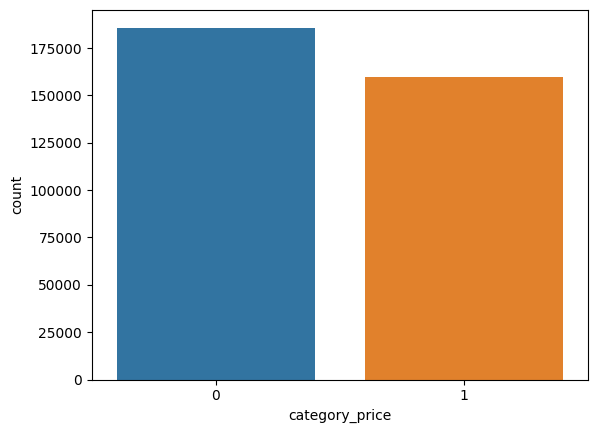

In [313]:
sns.countplot(x='category_price', data=data)
plt.show()

In [25]:
# Total de registros
total = data.shape[0]
total

345261

In [26]:
# Registros con categoría 1
cat_1 = data[data.category_price == 1].shape[0]
cat_1

159466

In [27]:
# Registros con categoría 0
cat_0 = data[data.category_price == 0].shape[0]
cat_0

185795

In [28]:
print(f'Porcentaje de propiedades con precios bajos: {round(cat_1 / total * 100, 2)}%')
print(f'Porcentaje de propiedades con precios superiores a los precios bajos: {round(cat_0 / total * 100, 2)}%')

Porcentaje de propiedades con precios bajos: 46.19%
Porcentaje de propiedades con precios superiores a los precios bajos: 53.81%


In [314]:
X = data[['sqfeet',"state","type","beds","baths"] ]  
                                                 
y = data.category_price

In [315]:
X.head()

,sqfeet,state,type,beds,baths
0,1200,0,0,2,2.0
1,694,1,1,1,1.0
2,900,2,1,2,2.0
3,1469,3,0,3,2.0
4,700,4,1,1,1.0


In [317]:
y.value_counts()

0    185795
1    159466
Name: category_price, dtype: int64

In [318]:
# Importaciones
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.pipeline import Pipeline
import joblib

# <span style="color:#CA2805">Creción del Pipeline</span>

In [319]:

pipe_clf = Pipeline([('clf', DecisionTreeClassifier(max_depth = 7, random_state = 42) ),])



In [320]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [321]:
pipe_clf.fit(x_test, y_test)

Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=7, random_state=42))])

In [324]:
#Guardamos el Pipeline en un archivo Pickle
joblib.dump(pipe_clf, 'modelo_arbol_decision.pkl', compress=1)

['modelo_arbol_decision.pkl']

In [325]:
#Cargamos el archivo creado de nuestro modelo
clf = joblib.load('modelo_arbol_decision.pkl')

In [326]:
y_pred = clf.predict(x_test)
#Para mejorar el recall ajustamos el umbral (THRESHOLD)
#y_pred = np.where(clf.predict_proba(x_test) [:,1] > 0.3, 1,0)

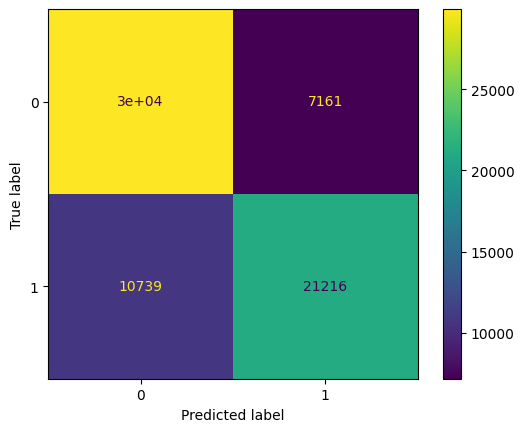

In [327]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()

In [328]:
rs = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

print(f'Recall: {rs}')
print(f'Precision: {ps}')
print(f'Accuracy: {ac}')

Recall: 0.663933656704741
Precision: 0.747647742890369
Accuracy: 0.7407788220642115


# <span style="color:#CA2805">Archivo Test</span>

In [336]:
# Cargamos el DataFrame
data_t = pd.read_parquet('Datasets/test.parquet')

In [337]:
# Obtenemos los índices de los registros con sqfeet con valores igual a 0
sin_desc = data_t[data_t["sqfeet"]==0].index

In [338]:
def crearSqfeet(df,num_loc):

    tipo= df["type"][num_loc]
    estado= df["state"][num_loc]
    df=df[df["type"]==tipo]
    df=df[df["state"]==estado]
    promedio=int(df["sqfeet"].mean())
    return promedio

In [339]:
# Recorremos los índices de los registros con sqfeet igual a 0
# y las vamos completando
for idx in sin_desc:
    data_t.loc[idx,('sqfeet')] = crearSqfeet(data_t, idx) 

In [340]:
#Nos quedamos con las colummnas que nos interesan
data_t=data_t[["sqfeet","type","state","beds","baths"]]

In [341]:

# Creo Diccionaros para reemplazar los varlos de las columnas type y state
x_type= (data_t['type'].unique())

x_state= (data_t['state'].unique())
my_dictypet ={}
i = 0
for item in x_type:
    my_dictypet[item] = i
    i=i+1

print(my_dictypet)

my_dicstatet ={}
i = 0
for item in x_state:
    my_dicstatet[item] = i
    i=i+1

print(my_dicstatet)


{'manufactured': 0, 'apartment': 1, 'house': 2, 'townhouse': 3, 'condo': 4, 'duplex': 5, 'cottage/cabin': 6, 'loft': 7, 'in-law': 8, 'flat': 9}
{'mi': 0, 'vt': 1, 'co': 2, 'va': 3, 'ut': 4, 'sc': 5, 'nj': 6, 'oh': 7, 'nc': 8, 'il': 9, 'nd': 10, 'ca': 11, 'ky': 12, 'ks': 13, 'mo': 14, 'ct': 15, 'tx': 16, 'az': 17, 'or': 18, 'nv': 19, 'in': 20, 'al': 21, 'fl': 22, 'ga': 23, 'ia': 24, 'wi': 25, 'la': 26, 'tn': 27, 'wa': 28, 'ms': 29, 'pa': 30, 'de': 31, 'md': 32, 'nm': 33, 'ok': 34, 'ar': 35, 'mn': 36, 'ri': 37, 'ak': 38, 'hi': 39, 'id': 40, 'ny': 41, 'me': 42, 'wv': 43, 'mt': 44, 'ne': 45, 'nh': 46, 'ma': 47, 'sd': 48, 'dc': 49, 'wy': 50}


In [342]:
data_t['type'] = data_t['type'].map(my_dictype)
data_t['state'] = data_t['state'].map(my_dicstate)
data_t.head(30)

,sqfeet,type,state,beds,baths
0,1344,5,32,3,2.0
1,1050,1,49,2,1.0
2,1150,1,32,2,2.0
3,1280,1,1,2,2.5
4,783,1,2,2,1.0
5,1090,1,26,3,2.0
6,1034,1,29,2,2.0
7,748,1,25,1,1.0
8,1,0,30,2,1.5
9,1192,1,25,2,2.0


In [343]:
x_t = data_t[["sqfeet","state","type","beds","baths"]]

In [344]:
x_t.head()

,sqfeet,state,type,beds,baths
0,1344,32,5,3,2.0
1,1050,49,1,2,1.0
2,1150,32,1,2,2.0
3,1280,1,1,2,2.5
4,783,2,1,2,1.0


In [345]:
y_t_pred = clf.predict(x_t)
#y_t_pred = np.where(clf.predict_proba(x_t) [:,1] > 0.3, 1,0)

# <span style="color:#CA2805">Generacion del CSV</span>

In [346]:
# Creamos el DataFrame que contendrá las predicciones obtenidas
datosCsv = pd.DataFrame()

In [347]:
# Creamos la columna pred con los datos obtendiso de la predicción
datosCsv['pred'] = y_t_pred

In [350]:
# Lo guardamos con formato CSV
datosCsv.to_csv('PredictJavierVilca.csv', index=False)